In [1]:
#importing library: numpy as np
import numpy as np

#loading the save numpy arrays in the previous code into
data=np.load('data.npy')
target=np.load('target.npy')



In [4]:
#importing diffrent modules from keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split
#spliting the data into 2; one for training and one for testing
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
#running 20 epochs to train model and one with lowest loss is selected
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 54s 54ms/step - loss: 0.6937 - accuracy: 0.4838 - val_loss: 0.6933 - val_accuracy: 0.4758
Epoch 2/20
990/990 [==============================] - 53s 53ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4758
Epoch 3/20
990/990 [==============================] - 53s 53ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4758
Epoch 4/20
990/990 [==============================] - 53s 53ms/step - loss: 0.6932 - accuracy: 0.4808 - val_loss: 0.6932 - val_accuracy: 0.4758
Epoch 5/20
990/990 [==============================] - 53s 54ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4758
Epoch 6/20
990/990 [==============================] - 56s 57ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.4758
Epoch 7/20
990/990 [==============================] - 59s 59ms/step - loss: 0.6932 - accu

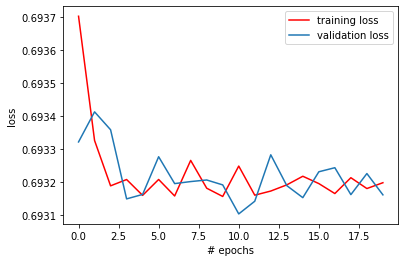

In [7]:
#importing module from library matplot to display graph 
from matplotlib import pyplot as plt

#ploting graph showing training loss and validation loss

#marking training loss with red line
plt.plot(history.history['loss'],'r',label='training loss')

#marking validation loss with blue line
plt.plot(history.history['val_loss'],label='validation loss')

#labelling x axis as epochs
plt.xlabel('# epochs')

#labelling x axis as loss
plt.ylabel('loss')

#displaying graph
plt.legend()
plt.show()

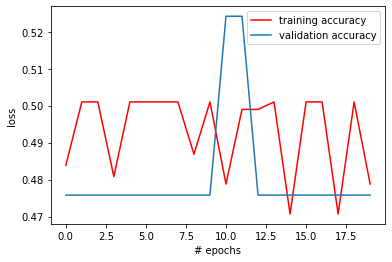

In [8]:
#ploting graph showing training accuracy and validation accuracy

#marking training accuracy with red line
plt.plot(history.history['accuracy'],'r',label='training accuracy')

#marking validation accuracy with blue line
plt.plot(history.history['val_accuracy'],label='validation accuracy')

#labelling x axis as epochs
plt.xlabel('# epochs')

#labelling x axis as loss
plt.ylabel('loss')

#displaying graph
plt.legend()
plt.show()

In [9]:
#printing test result
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 15ms/step
[0.6931154969809712, 0.5507246255874634]
